In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay

In [2]:
#Reading the Dataset
df = pd.read_csv('HR_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
#Renaming the Column 
df.rename(columns={'sales': 'department'}, inplace=True)

In [4]:
#Checking if there are missing Values or not
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [6]:
#Getting count of unique variables in categorical features
cat_col = ['department', 'salary']
for col in cat_col:
    print(f"{col}, no. of unique columns: {df[col].nunique()}")

department, no. of unique columns: 10
salary, no. of unique columns: 3


In [7]:
for col in cat_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [8]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,7,1
1,0.80,0.86,5,262,6,0,1,0,7,2
2,0.11,0.88,7,272,4,0,1,0,7,2
3,0.72,0.87,5,223,5,0,1,0,7,1
4,0.37,0.52,2,159,3,0,1,0,7,1


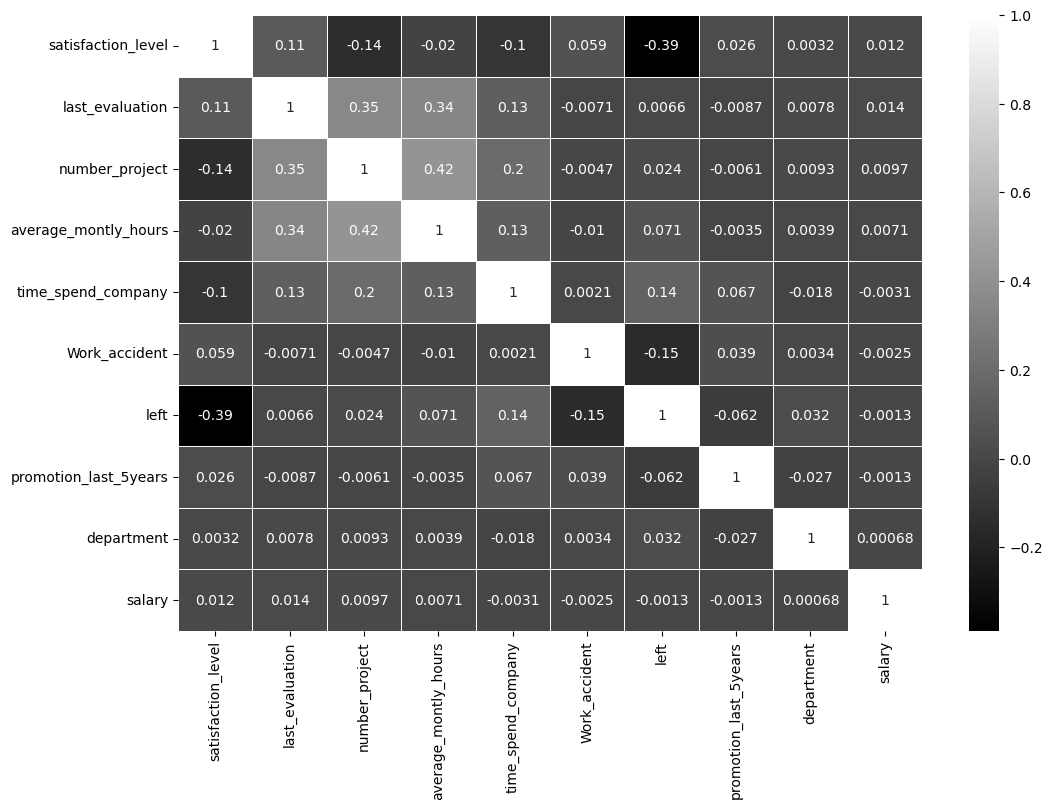

In [9]:
#correlation of data
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='grey', linewidths=0.5)
plt.show()

In [10]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,5.870525,1.347290
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.868786,0.625819
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,4.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,7.000000,1.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,8.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,9.000000,2.000000


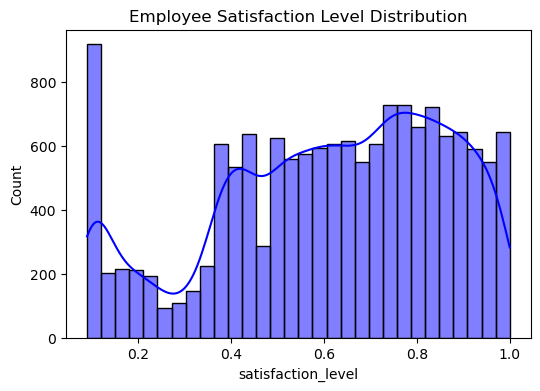

In [11]:
plt.figure(figsize=(6, 4))
sns.histplot(df['satisfaction_level'], kde=True, color='blue')
plt.title('Employee Satisfaction Level Distribution')
plt.show()

### Observations:
**Bimodal Distribution:** The distribution of satisfaction levels appears to have two prominent peaks, suggesting a bimodal distribution. This indicates that employees tend to cluster around two distinct levels of satisfaction:

    - One peak near low satisfaction (around 0.1 to 0.2).
    - Another broader peak near high satisfaction (around 0.7 to 1.0).

**High Count at Low Satisfaction:** There is a large spike in the number of employees with very low satisfaction (close to 0.1). This could signify a segment of employees who are highly dissatisfied with their jobs.

**Even Distribution at Moderate Levels:** In the middle range (between 0.3 and 0.6), the satisfaction levels are distributed fairly evenly, but without any significant peaks. This suggests that fewer employees fall in the "moderate satisfaction" range.

**Peak at High Satisfaction:** The second noticeable peak occurs between 0.7 and 1.0, indicating a significant proportion of employees are highly satisfied with their job.

**Dip Around 0.2 - 0.3:** There's a sharp decline between 0.2 and 0.3, suggesting that relatively few employees have slightly low satisfaction levels. This could reflect a polarization where employees are either very satisfied or highly dissatisfied.

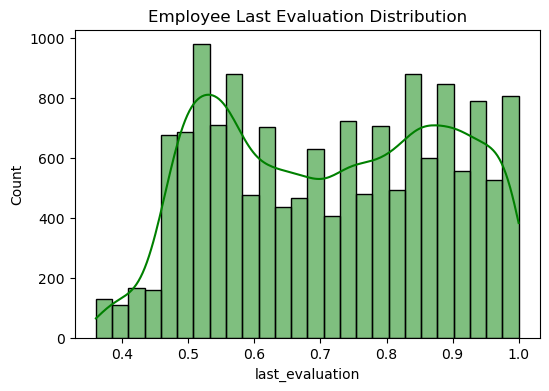

In [12]:
plt.figure(figsize=(6, 4))
sns.histplot(df['last_evaluation'], kde=True, color='green')
plt.title('Employee Last Evaluation Distribution')
plt.show()

### Observation
**Bimodal Distribution:** Similar to the satisfaction level distribution, the last evaluation scores exhibit a bimodal distribution with two noticeable peaks:

    - One peak between 0.5 and 0.6.
    - Another peak near 0.8 and 1.0.
    
**High Count at Mid Evaluation (0.5 - 0.6):** There is a strong peak around 0.5 to 0.6, indicating that many employees received average to slightly above-average evaluations.

**Another Peak at High Evaluation (0.8 - 1.0):** There’s also a significant group of employees who received very high evaluations, with many scoring above 0.8. This suggests that a large portion of employees is performing at a high level, according to their evaluations.

**Fewer Employees with Low Evaluation (< 0.5):** Comparatively, there are fewer employees with low evaluation scores (below 0.5), suggesting that poor performance is less common within the company.

**Dip Around 0.6 - 0.7:** There is a noticeable drop in the number of employees evaluated between 0.6 and 0.7. This might indicate a threshold where evaluations either group employees into "high" or "average/low" performers without many falling into the middle.

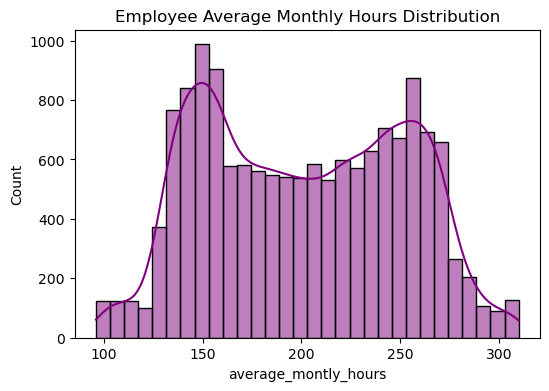

In [13]:
plt.figure(figsize=(6, 4))
sns.histplot(df['average_montly_hours'], kde=True, color='purple')
plt.title('Employee Average Monthly Hours Distribution')
plt.show()

### Observations:
**Bimodal Distribution:** The graph displays two distinct peaks, indicating a bimodal distribution of the average monthly hours worked by employees:

    - One peak around 150 hours.
    - Another peak around 250 hours.

**First Peak (~150 hours):** A large group of employees works around 150 hours per month, which is approximately equivalent to 37.5 hours per week. This group likely represents employees working within a standard or low-workload environment.

**Second Peak (~250 hours):** Another significant group of employees works close to 250 hours per month, or about 62.5 hours per week. This could indicate a high-workload environment where employees are working significantly more than standard hours.

**Lower Counts Between Peaks (~200 hours):** The middle range, between 200 and 220 hours, has fewer employees, suggesting a clear divide between those working a regular amount of hours and those who are working substantial overtime.

**Higher Monthly Hours (> 250 hours):** There is a small but notable portion of employees working more than 250 hours per month, even reaching up to 300 hours. This indicates a very high workload that might lead to employee burnout if sustained for long periods.

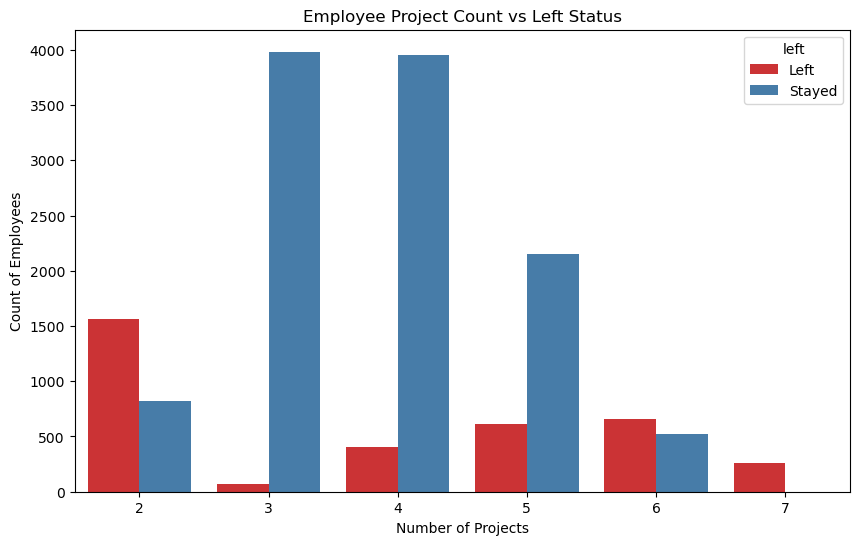

In [14]:
# Copy the dataframe
df_left_mode = df.copy()

# Convert 'left' column to categorical labels
df_left_mode['left'] = np.where(df_left_mode['left'] == 1, 'Left', 'Stayed')

# Plot the barplot
plt.figure(figsize=(10, 6))

# Bar plot showing the number of projects for employees who left or stayed
sns.countplot(x='number_project', hue='left', data=df_left_mode, palette='Set1')

# Add labels and title
plt.title('Employee Project Count vs Left Status')
plt.xlabel('Number of Projects')
plt.ylabel('Count of Employees')

# Display the plot
plt.show()

### Observation

**Low Projects (2 or fewer):**

    - Employees with 2 projects or fewer show a higher tendency to leave compared to those with 3 or more projects.
    - This may indicate that employees involved in fewer projects feel underutilized or less engaged, which could lead to dissatisfaction and eventual turnover.

**Mid-range Projects (3-4 projects):**

    - The majority of employees with 3 or 4 projects stayed with the company. Very few employees in this range left.
    - This suggests that employees managing 3-4 projects might have an optimal workload, balancing engagement without feeling overwhelmed.

**High Project Count (6-7 projects):**

    - Employees with 6 or 7 projects tend to leave more frequently compared to those with 5 projects.
    - A higher workload (6-7 projects) might be causing burnout, leading to a higher turnover rate among these employees.

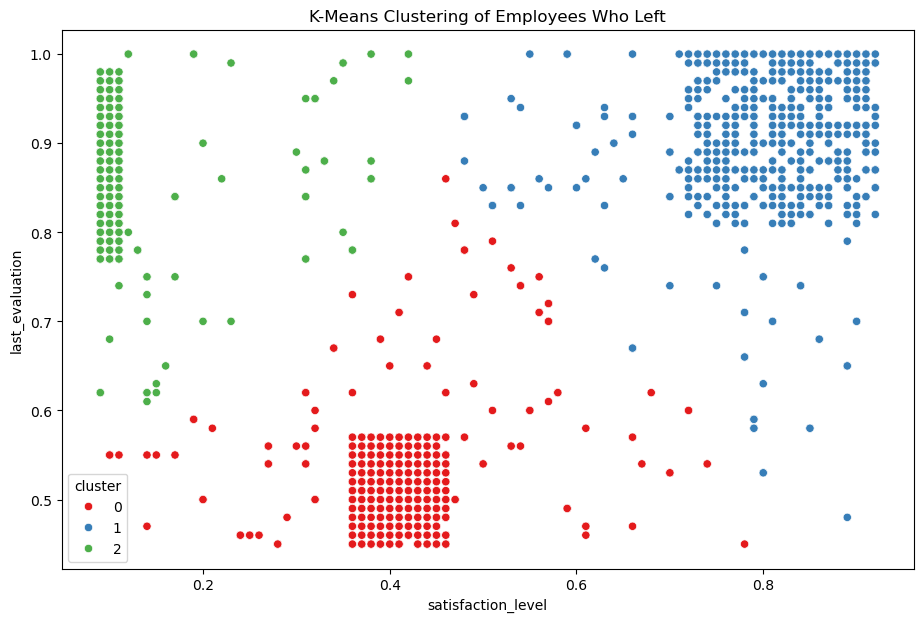

In [15]:
# Select relevant columns and filter for employees who left
left_employees = df.loc[df['left'] == 1].copy()
X = left_employees[['satisfaction_level', 'last_evaluation']]

# KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
left_employees.loc[:, 'cluster'] = kmeans.fit_predict(X)

# Visualize the clusters
plt.figure(figsize=(11, 7))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=left_employees, palette='Set1')
plt.title('K-Means Clustering of Employees Who Left')
plt.show()

**Cluster 0 (Blue):**
These employees have both high satisfaction and high evaluation scores.
The combination of high satisfaction and high evaluation suggests that these employees were engaged and performed well at their job. However, despite their good performance and satisfaction, they still left the company, possibly due to external factors such as lack of career advancement opportunities.

**Cluster 1 (Red):**
This cluster is composed of employees with low satisfaction levels and moderate evaluation scores.
Employees in this group seem to be the most dissatisfied, which could be a strong indicator of their reason for leaving. Low satisfaction coupled with moderate performance might suggest discontent with their roles or overall work environment.

**Cluster 2 (Green):**
These employees have high evaluation scores but relatively low satisfaction levels.
This indicates that while these employees were performing well (perhaps working hard to meet expectations), their dissatisfaction suggests they may have been overworked or not receiving adequate rewards, recognition, or opportunities for work-life balance. These factors could have contributed to their decision to leave despite their strong performance.

In [16]:
df_processed = pd.get_dummies(df, columns=['department', 'salary'], drop_first=True)

# Separating features and target variable
X = df_processed.drop('left', axis=1)
y = df_processed['left']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=123)

In [18]:
# Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

In [19]:
def model_func(models, X_train_scaled, X_test_scaled, y_train, y_test):
    for model in models:
        model_name = model.__class__.__name__
        print(f"Evaluation and classification report of {model_name}")
        print("---------------------------------------------------------")
        
        scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
        print(f"Cross-validation scores for {model_name}: {scores}")
        
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
        
        training_accuracy = accuracy_score(y_train, model.predict(X_train_scaled))
        testing_accuracy = accuracy_score(y_test, y_pred)
        print(f"Training accuracy for {model_name}: {training_accuracy}")
        print(f"Testing accuracy for {model_name}: {testing_accuracy}")
        
        print(classification_report(y_test, y_pred))
        
        conf_mat = confusion_matrix(y_test, y_pred)
        cm_display = ConfusionMatrixDisplay(confusion_matrix=conf_mat, display_labels=model.classes_)
        cm_display.plot(colorbar=False)
        plt.title(f'Confusion Matrix - {model_name}')
        plt.show()
        
        y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        auc_score = roc_auc_score(y_test, y_pred_proba)
        
        plt.plot(fpr, tpr, label=f'{model_name}: AUC = {auc_score:.2f}')
        plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
        plt.title(f'ROC Curve - {model_name}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend(loc='lower right')
        plt.show()


In [20]:
Logistic_Regression = LogisticRegression(
    max_iter=1000
)
Random_forest_cllassifier = RandomForestClassifier(
    random_state=42, 
    max_depth = 10, 
    n_estimators= 300
)
Gradient_boost_classifier = GradientBoostingClassifier(
    learning_rate=0.05, 
    n_estimators=300, 
    max_depth=9, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    subsample=0.9, 
    random_state=42
)

models = [Logistic_Regression, Random_forest_cllassifier, Gradient_boost_classifier]        

Evaluation and classification report of LogisticRegression
---------------------------------------------------------
Cross-validation scores for LogisticRegression: [0.73913043 0.78096801 0.80694558 0.82444627 0.82303063]
Training accuracy for LogisticRegression: 0.7959964996718443
Testing accuracy for LogisticRegression: 0.767
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2286
           1       0.51      0.74      0.60       714

    accuracy                           0.77      3000
   macro avg       0.71      0.76      0.72      3000
weighted avg       0.81      0.77      0.78      3000



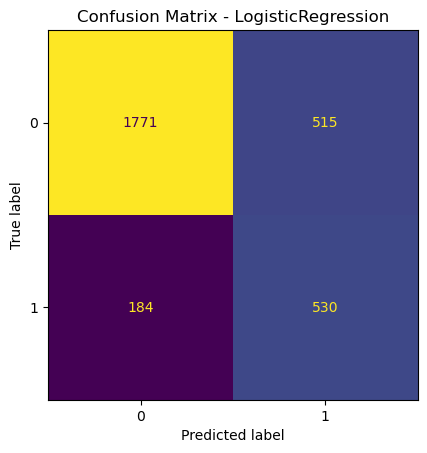

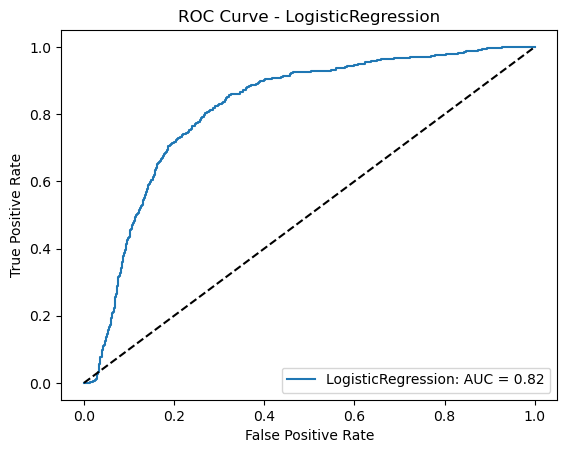

Evaluation and classification report of RandomForestClassifier
---------------------------------------------------------
Cross-validation scores for RandomForestClassifier: [0.96910036 0.96828001 0.97156139 0.96882691 0.97045952]
Training accuracy for RandomForestClassifier: 0.9774119448698315
Testing accuracy for RandomForestClassifier: 0.9766666666666667
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2286
           1       0.97      0.93      0.95       714

    accuracy                           0.98      3000
   macro avg       0.97      0.96      0.97      3000
weighted avg       0.98      0.98      0.98      3000



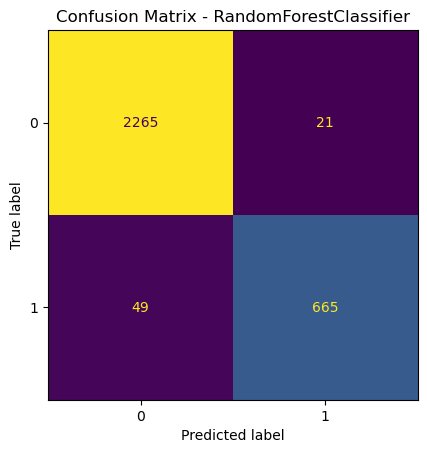

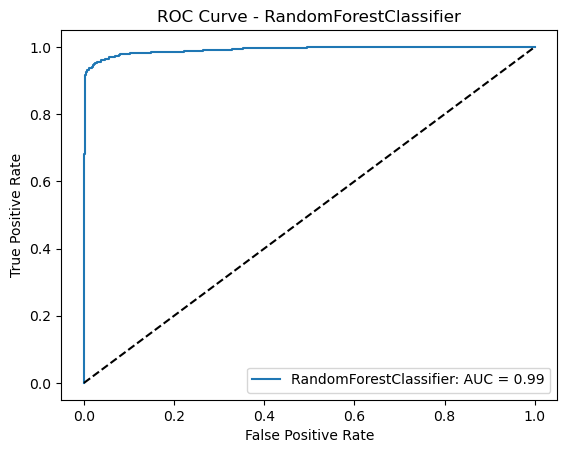

Evaluation and classification report of GradientBoostingClassifier
---------------------------------------------------------
Cross-validation scores for GradientBoostingClassifier: [0.97894449 0.98386656 0.98960897 0.9846869  0.98796499]
Training accuracy for GradientBoostingClassifier: 1.0
Testing accuracy for GradientBoostingClassifier: 0.989
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.97      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.98      0.99      0.98      3000
weighted avg       0.99      0.99      0.99      3000



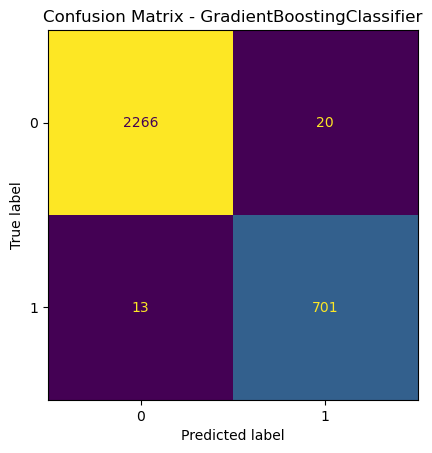

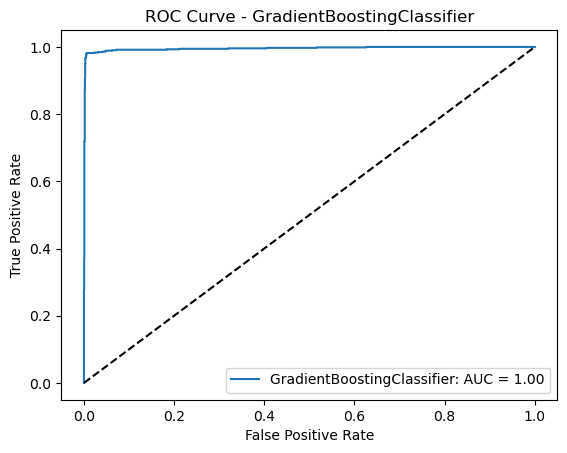

In [21]:
model_func(models, X_train_smote, X_test,y_train_smote,y_test)

**Key Metrics Comparison:**
- Logistic Regression has moderate performance but struggles to predict employee turnover accurately due to lower precision for Class 1 (those who left).
- Random Forest offers a very strong balance between precision and recall, making it a reliable model for predicting turnover.
- Gradient Boosting outperforms both models in almost all metrics but shows signs of potential overfitting with a perfect training accuracy.

**Best Model:**
- Gradient Boosting Classifier is the best-performing model, with a testing accuracy of 0.989 and high precision/recall for both classes. Despite the overfitting signs, its superior performance on the test set makes it the best choice for this prediction task.

**Confusion Matrix Analysis:**
- The confusion matrix should focus on Recall for Class 1 (those who left) because the company wants to capture as many employees at risk of leaving as possible.
Precision is important but less critical in this case because false positives (predicting an employee will leave when they won’t) are less harmful than false negatives (missing someone who might leave). Hence, a balance of both metrics is needed, but Recall would have a higher priority for retention strategies.

In [22]:
# Fit the GradientBoostingClassifier and predict probabilities
gbC = GradientBoostingClassifier(
    learning_rate=0.05, 
    n_estimators=300, 
    max_depth=9, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    subsample=0.9, 
    random_state=42
)

gbC.fit(X_train_smote, y_train_smote)
gbC.predict(X_test)
y_prob = gbC.predict_proba(X_test)[:, 1]

def categorize_risk(score):
    if score < 0.2:
        return 'Safe Zone (Green)'
    elif 0.2 <= score < 0.6:
        return 'Low-Risk Zone (Yellow)'
    elif 0.6 <= score < 0.9:
        return 'Medium-Risk Zone (Orange)'
    else:
        return 'High-Risk Zone (Red)'

X_test['risk_zone'] = [categorize_risk(prob) for prob in y_prob]
X_test[['risk_zone', 'satisfaction_level', 'last_evaluation']].head()

,risk_zone,satisfaction_level,last_evaluation
10627,Safe Zone (Green),0.98,0.77
2703,High-Risk Zone (Red),0.76,0.93
6059,Safe Zone (Green),0.70,0.93
3258,Safe Zone (Green),0.48,0.61
4565,Safe Zone (Green),0.57,0.90
